## Катання на CartPole

> **Проблема**: Якщо Петро хоче втекти від вовка, йому потрібно рухатися швидше за нього. Ми побачимо, як Петро може навчитися кататися на ковзанах, зокрема, утримувати рівновагу, використовуючи Q-Learning.

Спочатку встановимо gym і імпортуємо необхідні бібліотеки:


In [1]:
#code block 1

## Створіть середовище cartpole


In [ ]:
#code block 2

Щоб побачити, як працює середовище, давайте запустимо коротку симуляцію на 100 кроків.


In [ ]:
#code block 3

Під час симуляції нам потрібно отримувати спостереження, щоб вирішити, як діяти. Насправді функція `step` повертає нам поточні спостереження, функцію винагороди та прапорець `done`, який вказує, чи має сенс продовжувати симуляцію чи ні:


In [ ]:
#code block 4

Ми можемо отримати мінімальне та максимальне значення цих чисел:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Давайте також дослідимо інший метод дискретизації за допомогою бінів:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Давайте зараз проведемо коротку симуляцію і спостерігатимемо за цими дискретними значеннями середовища.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


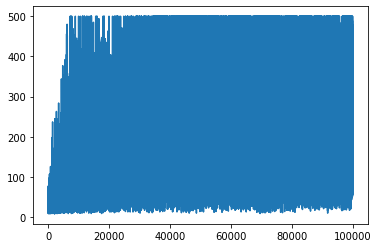

In [20]:
plt.plot(rewards)

З цього графіка неможливо нічого сказати, оскільки через природу стохастичного процесу навчання тривалість навчальних сесій сильно варіюється. Щоб надати більше сенсу цьому графіку, ми можемо обчислити **ковзне середнє** по серії експериментів, скажімо, 100. Це можна зручно зробити за допомогою `np.convolve`:


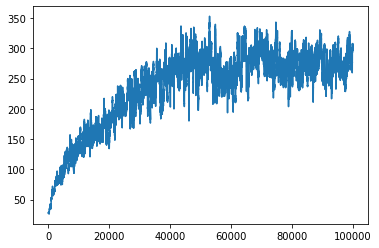

In [22]:
#code block 12

## Зміна гіперпараметрів і спостереження за результатами

Тепер було б цікаво побачити, як поводиться навчена модель. Давайте запустимо симуляцію, і ми будемо дотримуватися тієї ж стратегії вибору дій, що й під час навчання: вибір на основі ймовірнісного розподілу в Q-таблиці:


In [23]:
# code block 13

## Збереження результату у форматі анімованого GIF

Якщо ви хочете здивувати своїх друзів, ви можете надіслати їм анімоване GIF-зображення балансуючого стрижня. Для цього ми можемо викликати `env.render`, щоб створити кадр зображення, а потім зберегти ці кадри у форматі анімованого GIF за допомогою бібліотеки PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Відмова від відповідальності**:  
Цей документ було перекладено за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, зверніть увагу, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ мовою оригіналу слід вважати авторитетним джерелом. Для критично важливої інформації рекомендується професійний людський переклад. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникли внаслідок використання цього перекладу.
